# Task 1: Problem definition

## Objectives for the Data Pipeline:

**Objective 1: Identify Location and Room-Type with Highest Investment Return:**  
This involves analyzing historical resale price data to determine which locations and types of rooms (e.g., 4-room, 5-room, etc.) have shown the highest return on investment over the past years. It aims to provide insights for potential property investors or homeowners looking to maximize their returns.

**Objective 2: Predict Price Growth for Future Using Machine Learning:**  
This objective involves building predictive models using machine learning algorithms on historical resale price data to forecast future price growth. By leveraging past trends and patterns, the goal is to provide stakeholders with insights into potential future price movements, aiding in decision-making processes related to property investment.

### Measurement of Success:

The success of the data pipeline can be measured based on the following criteria:

- **Accuracy of Predictions:** For Objective 1, success can be measured by the accuracy of identifying locations and room types with the highest investment return based on historical data analysis. For Objective 2, success can be measured by the accuracy of the machine learning models in predicting future price growth.
- **Return on Investment (ROI):** Success can also be evaluated based on the ROI achieved by stakeholders who utilize the insights provided by the data pipeline. Higher ROI indicates the effectiveness of the insights generated.
- **User Feedback:** Soliciting feedback from stakeholders who utilize the insights generated by the data pipeline can also be a valuable measure of success. Positive feedback indicating that the insights are actionable and useful would signify success.

### Use Cases for the Data Pipeline:

The data pipeline will serve various use cases including:

- **Reporting:** Generating reports on historical resale price trends, identifying locations and room types with the highest investment return, and providing summaries of machine learning predictions for future price growth.
- **Analytics:** Performing in-depth analysis of historical resale price data to uncover trends, patterns, and correlations that can inform decision-making related to property investment.
- **Machine Learning:** Developing and deploying machine learning models to predict future price growth based on historical data, enabling stakeholders to make informed decisions about property investment strategies.


# Task 2: Data collection/curation

In [4]:
import re
import datetime
import warnings
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from matplotlib import rcParams
import matplotlib.pyplot as plt
from pathlib import Path

warnings.filterwarnings('ignore')
# sns.set_theme()

# figure size in inches
rcParams['figure.figsize'] = 11.7,5.27

The primary dataset required for this analysis is the HDB resale price data, which contains information about the resale prices of HDB flats in different locations and with various room types over past years. This dataset can be downloaded from data.gov.sg, specifically from these links:

1. [Resale flat prices based on registration date from Jan-2017 onwards](https://beta.data.gov.sg/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view)
2. [Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016](https://beta.data.gov.sg/datasets/d_ea9ed51da2787afaf8e51f827c304208/view)
3. [Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014](https://beta.data.gov.sg/datasets/d_2d5ff9ea31397b66239f245f57751537/view)

The 3 csv files are concatenated together to form the starting dataset. 

To work towards to the objectives defined in Task 1, we intend to proceed with the following steps: 

1. Data Cleaning and Preparation: Preprocess the data to handle missing values, outliers, and inconsistencies. Ensure proper formatting of variables such as location, room type, and price. 

2. Exploratory Data Analysis (EDA): 
    - Conduct EDA on the integrated dataset to understand the distributions, correlations, and patterns within the data. 
    - Identify potential features that correlate with investment return and price growth, such as location, room type, economic indicators, and demographic factors. 

3. Model Development: 
    - Identify Features: Select relevant features for modeling based on insights from EDA and domain knowledge. 
    - Machine Learning Algorithms: Choose appropriate machine learning algorithms (e.g., regression, ensemble methods) for predicting price growth. 
    - Model Training: Train the selected models on historical data, utilizing techniques such as cross-validation to ensure robustness. 
4. Model Evaluation: 
    - Performance Metrics: Evaluate model performance using metrics such as accuracy, precision, F1 score, and RMSE (Root Mean Squared Error) for regression tasks. 
    - Validation: Validate models on holdout datasets or through time-series cross-validation to assess generalization performance. 
5. Interpretation and Insights: 
    - Interpret model results to understand the factors driving investment return and price growth. 
    - Extract actionable insights for stakeholders, such as identifying high-return locations and room types or predicting future price trends.

# Task 3: Data preparation

## Initial Loading of data

For loading the data we will be using, we create a folder to put the curated input data:

In [5]:
if not Path("./input").exists():
    Path('./input').mkdir()

The 3 files from 2012 to present day (2024) are downloaded from:
1. [Resale flat prices based on registration date from Jan-2017 onwards](https://beta.data.gov.sg/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view)
2. [Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016](https://beta.data.gov.sg/datasets/d_ea9ed51da2787afaf8e51f827c304208/view)
3. [Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014](https://beta.data.gov.sg/datasets/d_2d5ff9ea31397b66239f245f57751537/view)

and placed into the relative directory `./input` as csvs.  
This is provided in the accompanying folder (downloaded 19th March) however please redownload from the aforementioned sources to rebuild the dataset on the latest data if necessary.

The following reads the files into memory and shows the types of data available:

In [6]:
files = Path('./input').glob('*.csv')
all_files = []
for file in files:
    df = pd.read_csv(file)
    print(f"Rows: {len(df)}, file: {file.name}")
    all_files.append(df)
dfs = pd.concat(all_files)
dfs = dfs.sort_values('month')

Rows: 37153, file: ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv
Rows: 175110, file: ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv
Rows: 52203, file: ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv


In [7]:
# Taking a sample to show what the data looks like
dfs.sample(n=10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
118269,2022-01,SEMBAWANG,3 ROOM,590C,MONTREAL LINK,13 TO 15,68.0,Model A,2015,92 years 03 months,388000.0
42605,2019-01,GEYLANG,4 ROOM,34,CASSIA CRES,10 TO 12,93.0,New Generation,1981,61 years 06 months,560000.0
8441,2017-06,CHOA CHU KANG,4 ROOM,685C,CHOA CHU KANG CRES,13 TO 15,85.0,Model A2,2002,84 years 05 months,340000.0
25795,2018-04,PUNGGOL,5 ROOM,172B,EDGEDALE PLAINS,13 TO 15,110.0,Improved,2004,85 years,420000.0
25599,2016-06,ANG MO KIO,3 ROOM,577,ANG MO KIO AVE 10,04 TO 06,67.0,New Generation,1980,62,312000.0
164873,2023-10,WOODLANDS,5 ROOM,694B,WOODLANDS DR 62,01 TO 03,113.0,Improved,2018,94 years,625000.0
133778,2022-08,SENGKANG,5 ROOM,128,RIVERVALE ST,07 TO 09,121.0,Improved,1999,75 years 11 months,528000.0
137358,2022-10,BUKIT MERAH,3 ROOM,8,TELOK BLANGAH CRES,07 TO 09,59.0,Improved,1975,51 years 07 months,330000.0
154731,2023-06,BUKIT BATOK,4 ROOM,450B,BT BATOK WEST AVE 6,07 TO 09,93.0,Model A,2019,94 years 10 months,580000.0
50289,2014-11,PASIR RIS,EXECUTIVE,408,PASIR RIS DR 6,01 TO 03,152.0,Maisonette,1990,NaN,625000.0


In [8]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264466 entries, 1303 to 173931
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                264466 non-null  object 
 1   town                 264466 non-null  object 
 2   flat_type            264466 non-null  object 
 3   block                264466 non-null  object 
 4   street_name          264466 non-null  object 
 5   storey_range         264466 non-null  object 
 6   floor_area_sqm       264466 non-null  float64
 7   flat_model           264466 non-null  object 
 8   lease_commence_date  264466 non-null  int64  
 9   remaining_lease      212263 non-null  object 
 10  resale_price         264466 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 24.2+ MB


### Data cleaning and handling null values
From the above information, we can see that as `remaining_lease` is in the following format, `## years ## months`, we will need to clean this data into a metric that would make sense / sortable as it is mostly continuous data. We can express this as [year].[month/12].

For the `NaN` values (Not a number, akin to None or Null in this case), we chose to impute the value based on `99 - (year sold - lease_commence_date)`:

In [9]:
# The value True is the number of na values in the dataset
dfs['remaining_lease'].apply(lambda x: pd.isna(x)).value_counts()

False    212263
True      52203
Name: remaining_lease, dtype: int64

We can fill in only the null values using `99 - (year sold - lease_commence_date)` and reassigning this back in remaining_lease as str to be
consistent with the previous format for year only dates. As the months are not provided for `lease_commence_date`, we can
just use the year sold.

The following function applied finds if the remaining lease column is na, else imputes the remaining lease based on the fact we know leases for HDBs are usually maximum 99 years.

In [10]:
dfs['remaining_lease'] = dfs.apply(lambda row: (f"{99 - (datetime.datetime.strptime(row['month'], '%Y-%m').year - row['lease_commence_date'])} years" 
                                              if pd.isna(row['remaining_lease']) else row['remaining_lease']), axis=1)

In [11]:
dfs['remaining_lease'].apply(lambda x: pd.isna(x)).value_counts()

False    264466
Name: remaining_lease, dtype: int64

Another method could have been to leave the null values. We had investigated that it is possible to do so as the percentage null values is under a threshold that is found acceptable in literature;

In [12]:
print(f'Percentage null values {(52203 / (212263 + 52203)) * 100:.2f}%')

Percentage null values 19.74%


Knowing that imputing / filling in the values of null with the column average may bias the dataset from the other rows (ie the average price of town Orchard would unlikely yield the same average price for Tuas had their been any residential lots there), we decided to leave the null values as is.

**Source**: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8426774/  
APA citation: Hyuk Lee, J., & Huber Jr., J. C. (2021). Evaluation of multiple imputation with large proportions of missing data: How much is too much? Iranian Journal of Public Health. https://doi.org/10.18502/ijph.v50i7.6626 

Research here done multiple imputation on dataset with 20% missing values and 80% missing values found that higher missing values warrants a greater need for MI becayse MI produced less biased estimates under all missing mechanisms. Since less than 20% is still an acceptable threshold of missing value, the missing values in remaining_lease is kept. 


However in this analysis, as year of `month` sold - `lease_commence_date` was available to serve as a way to calculate the approximate remaining lease for the house

In addition, the following were discovered:
* `resale_price` all end with `,000` can be reduced to be expressed as ##k for simplification. (i.e. `resale_price`/1000)
* The block infomation is irrelevant to the analysis, beacause we have town to analysis on, therefore we can drop this column
* The street_name is also irrelevant the same reason as block, therefore we can drop this column

In [13]:
'''This part of the code take care of the remaining_lease column and replace it with a column called lease_left'''
pattern = re.compile("(?P<year>\d+)(?:\ (?P<month>\d+) months)?")

def lease_to_float(remaining_lease) -> float:
    """
    args:
        remaining_lease (str): form of "\d+ years \d+ months"
    returns:
        int: year match
        int: month match if any
        float64: 
            float representation of year with 
            month expressed as decimal hence sortable
    """
    if pd.isna(remaining_lease): 
        return None, None, None
    remaining_lease = str(remaining_lease)
    matches = pattern.findall(remaining_lease)
    matches = [i[0] for i in matches]
    if len(matches) < 2:
        matches.append(0)
    return matches + [float(matches[0])+(float(matches[1])/12)]

dfs = dfs.reset_index(drop=True)
# Apply the cleaning function to the data
dfs[['year', 'months', 'lease_left']] = pd.DataFrame(dfs['remaining_lease'].apply(lease_to_float).to_list(), index=dfs.index)

# Check if any data loss during the cleaning process
dfs[['lease_left', 'remaining_lease']].info()

# Create a column that is casted to datetime
dfs['month_dt'] = pd.to_datetime(dfs['month'], format='%Y-%m')

# drop the original column and save the cleaned data
dfs = dfs.drop(columns=['remaining_lease', 'month'])

dfs.to_csv('2012-3--2024-3.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264466 entries, 0 to 264465
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lease_left       264466 non-null  float64
 1   remaining_lease  264466 non-null  object 
dtypes: float64(1), object(1)
memory usage: 4.0+ MB


In [14]:
# The code below drop block and street_name columns and reformats the resale_price column
dfs['resale_price_thousand'] = dfs['resale_price'] / 1000

dfs = dfs.drop(columns=['block', 'street_name'])

In [15]:
# Check the current data format
dfs.sample(n=5)

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,months,lease_left,month_dt,resale_price_thousand
80926,JURONG WEST,4 ROOM,04 TO 06,104.0,Model A,1997,393000.0,80,0,80.000000,2016-07-01,393.0
70955,HOUGANG,5 ROOM,01 TO 03,122.0,Improved,1989,520000.0,73,0,73.000000,2016-01-01,520.0
67081,CLEMENTI,4 ROOM,13 TO 15,92.0,New Generation,1979,535000.0,62,0,62.000000,2015-10-01,535.0
131673,MARINE PARADE,3 ROOM,10 TO 12,65.0,Improved,1975,335000.0,55,05,55.416667,2019-01-01,335.0
4662,SERANGOON,4 ROOM,11 TO 15,100.0,Model A,1997,468000.0,84,0,84.000000,2012-05-01,468.0


In [16]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264466 entries, 0 to 264465
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   town                   264466 non-null  object        
 1   flat_type              264466 non-null  object        
 2   storey_range           264466 non-null  object        
 3   floor_area_sqm         264466 non-null  float64       
 4   flat_model             264466 non-null  object        
 5   lease_commence_date    264466 non-null  int64         
 6   resale_price           264466 non-null  float64       
 7   year                   264466 non-null  object        
 8   months                 264466 non-null  object        
 9   lease_left             264466 non-null  float64       
 10  month_dt               264466 non-null  datetime64[ns]
 11  resale_price_thousand  264466 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

In [17]:
dfs.describe()

,floor_area_sqm,lease_commence_date,resale_price,lease_left,resale_price_thousand
count,264466.000000,264466.000000,2.644660e+05,264466.000000,264466.000000
mean,96.992172,1993.971195,4.797057e+05,74.735136,479.705659
std,24.243036,13.202825,1.594134e+05,12.858426,159.413352
min,31.000000,1966.000000,1.000000e+05,41.750000,100.000000
25%,76.000000,1984.000000,3.638880e+05,64.500000,363.888000
50%,94.000000,1993.000000,4.500000e+05,74.000000,450.000000
75%,112.000000,2003.000000,5.633750e+05,85.000000,563.375000
max,280.000000,2022.000000,1.568888e+06,98.000000,1568.888000


# Task 4: Exploratory data analysis and visualization

## Understanding the data

To understand the data, we can define a helper function to help plot some categorical variables

In [18]:
#summary statistics of categorical data 
print(dfs[['town','flat_type','flat_model']].describe())


            town flat_type flat_model
count     264466    264466     264466
unique        26         7         21
top     SENGKANG    4 ROOM    Model A
freq       20288    109186      86288


In [20]:
cross_tab = pd.crosstab(dfs['flat_type'], dfs['flat_model'])
print(cross_tab)

flat_model        2-room  3Gen  Adjoined flat  Apartment  DBSS  Improved  \
flat_type                                                                  
1 ROOM                 0     0              0          0     0       119   
2 ROOM                85     0              0          0     1       832   
3 ROOM                 0     0              0          0   430     17026   
4 ROOM                 0     0             50          0  1259      3113   
5 ROOM                 0    28            235          0  1555     45311   
EXECUTIVE              0     0            157      10122     0         0   
MULTI-GENERATION       0     0              0          0     0         0   

flat_model        Improved-Maisonette  Maisonette  Model A  \
flat_type                                                    
1 ROOM                              0           0        0   
2 ROOM                              0           0     2008   
3 ROOM                              0           0    16370   
4 ROO

In [20]:
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(cross_tab)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 683545.8999649041, p-value: 0.0


## Floor-size over time Trend Analysis:
* Check the distribution of floor size and resale prices
* Analyze the trend of flat sizes (floor area) resale price changes over time.
* Show remaining lease distribution for exploratory data analysis

Floor Area Statistics:
 count    264466.000000
mean         96.992172
std          24.243036
min          31.000000
25%          76.000000
50%          94.000000
75%         112.000000
max         280.000000
Name: floor_area_sqm, dtype: float64
Resale Price Statistics:
 count    264466.000000
mean        479.705659
std         159.413352
min         100.000000
25%         363.888000
50%         450.000000
75%         563.375000
max        1568.888000
Name: resale_price_thousand, dtype: float64
Remaining Lease Statistics:
 count    264466.000000
mean         74.735136
std          12.858426
min          41.750000
25%          64.500000
50%          74.000000
75%          85.000000
max          98.000000
Name: lease_left, dtype: float64


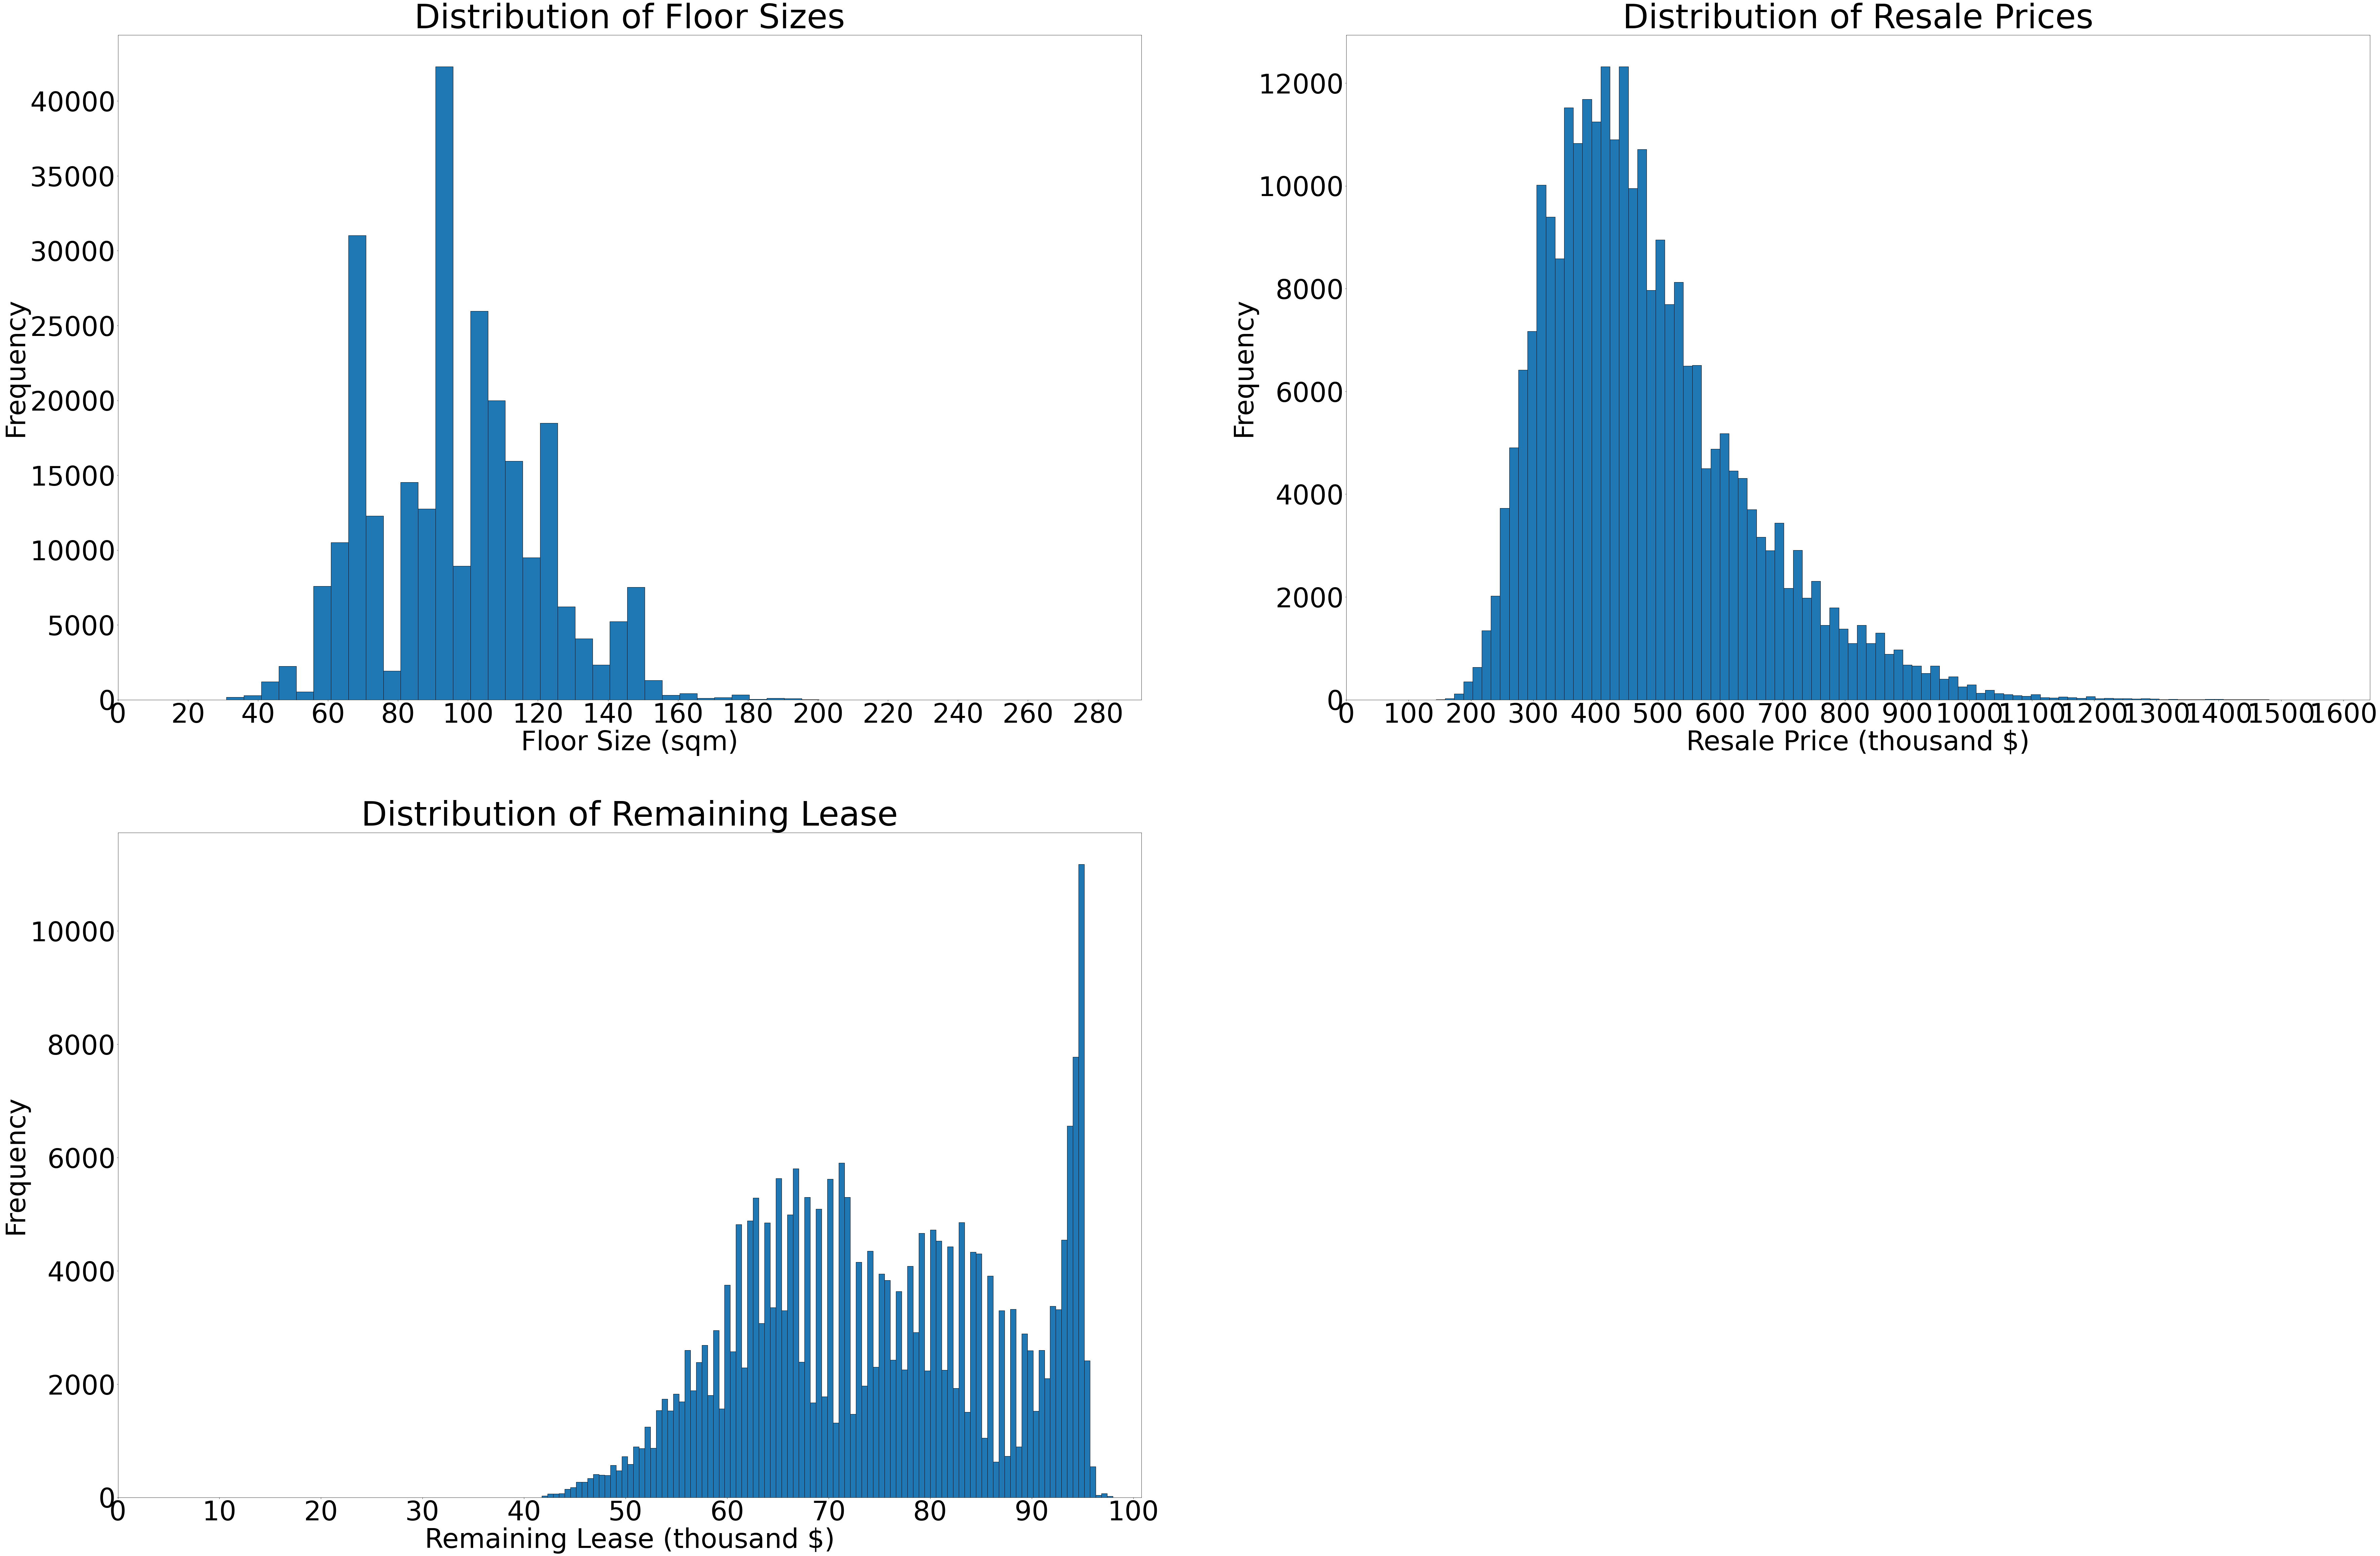

In [21]:
plt.figure(figsize=(120, 80))  # Adjust the figure size to accommodate both plots

# Plot for floor area
plt.subplot(2, 2, 1)  # 1 row, 2 columns, plot number 1
plt.hist(dfs['floor_area_sqm'], bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Floor Sizes', fontsize=100)
plt.xlabel('Floor Size (sqm)', fontsize=80)  # Add unit to the x-axis label
plt.ylabel('Frequency', fontsize=80)
plt.xticks(range(0, int(max(dfs['floor_area_sqm']))+10, 20))  # Set x-axis ticks with a step size of 10
plt.tick_params(axis='both', which='major', labelsize=80)  # Increase the size of the numbers on the axes

# Print a table with detailed statistics about floor area in the terminal
floor_area_stats = dfs['floor_area_sqm'].describe()
print("Floor Area Statistics:\n", floor_area_stats)

# Plot for resale price
plt.subplot(2, 2, 2)  # 1 row, 2 columns, plot number 2
plt.hist(dfs['resale_price_thousand'], bins=100, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Resale Prices', fontsize=100)
plt.xlabel('Resale Price (thousand $)', fontsize=80)  # Add unit to the x-axis label
plt.ylabel('Frequency', fontsize=80)
plt.xticks(range(0, int(max(dfs['resale_price_thousand']))+100, 100))  # Set x-axis ticks with a step size of 10
plt.tick_params(axis='both', which='major', labelsize=80)  # Increase the size of the numbers on the axes

# Print a table with detailed statistics about resale price in the terminal
resale_price_stats = dfs['resale_price_thousand'].describe()
print("Resale Price Statistics:\n", resale_price_stats)

# Plot for resale price
plt.subplot(2, 2, 3)  # 1 row, 2 columns, plot number 3
plt.hist(dfs['lease_left'], bins=100, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Remaining Lease', fontsize=100)
plt.xlabel('Remaining Lease (thousand $)', fontsize=80)  # Add unit to the x-axis label
plt.ylabel('Frequency', fontsize=80)
plt.xticks(range(0, int(max(dfs['lease_left']))+10, 10))  # Set x-axis ticks with a step size of 10
plt.tick_params(axis='both', which='major', labelsize=80)  # Increase the size of the numbers on the axes

# Print a table with detailed statistics about resale price in the terminal
resale_price_stats = dfs['lease_left'].describe()
print("Remaining Lease Statistics:\n", resale_price_stats)

plt.show()

<br /><br />
Below, we continue to plot the price changes over time, seperating them into bins according to floor area to observe how the different price / size changed over time:

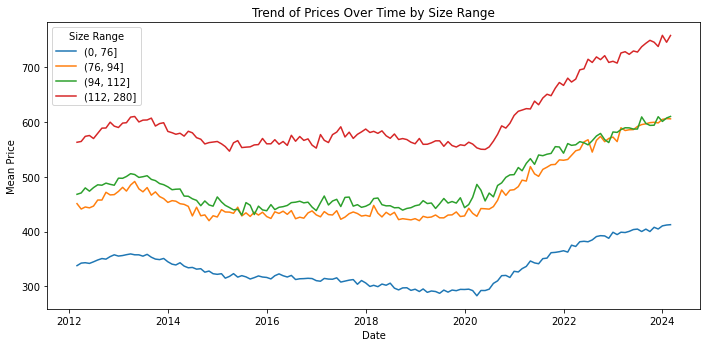

In [22]:
dfs.sort_values('month_dt', inplace=True)
# Define bins for different ranges of sizes
bins = [0, 76, 94, 112, 280]  # Adjust these values as needed

# Create a new column for the size range
dfs['size_range'] = pd.cut(dfs['floor_area_sqm'], bins)

# Group by size range and month, then calculate the mean resale price
grouped = dfs.groupby(['size_range', 'month_dt'], observed=True)['resale_price_thousand'].mean().reset_index()

# Plot the mean resale price over time for each size range
for size_range in grouped['size_range'].unique():
    subset = grouped[grouped['size_range'] == size_range]
    plt.plot(subset['month_dt'], subset['resale_price_thousand'], label=str(size_range))

plt.title('Trend of Prices Over Time by Size Range')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.legend(title='Size Range')
plt.show()

From these plots, we can observe the following:
- The real estate market has seen an overall increase in prices from 2012 to 2024, with larger flats experiencing a more substantial rise. This suggests a sustained demand for larger properties, or a market perception of greater value in larger units.
- Investors might consider focusing on larger properties for potentially higher returns. 

### Town affect on resale price over time

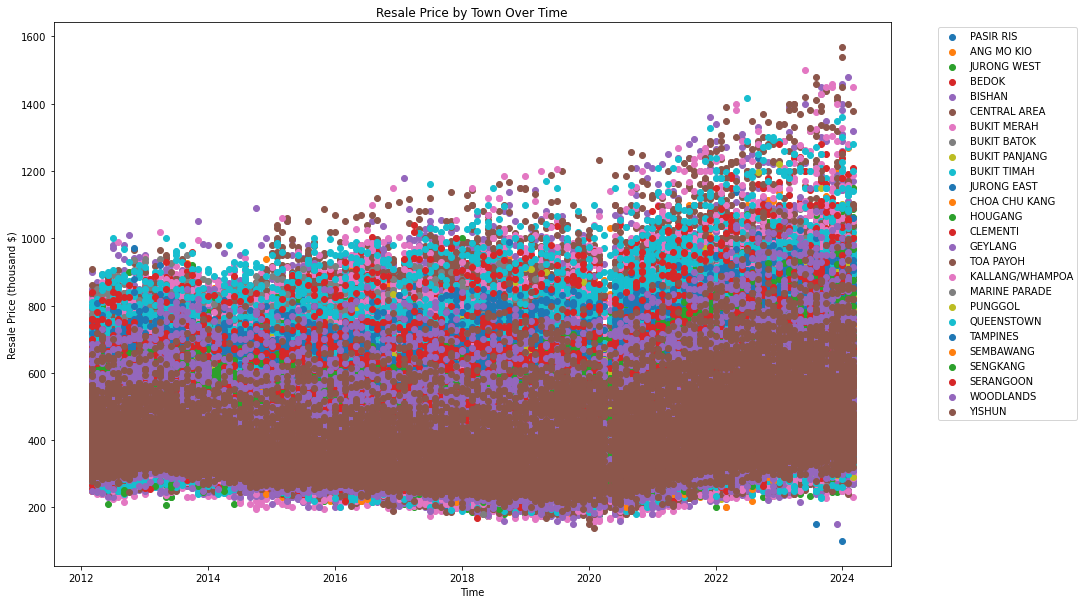

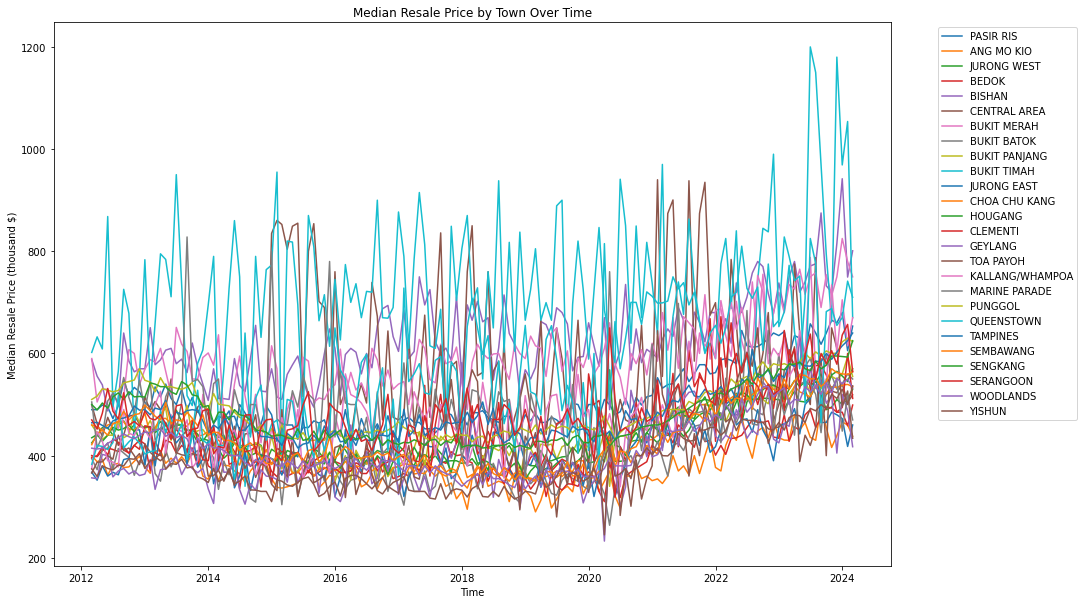

In [23]:
# Create a list of unique towns
towns = dfs['town'].unique()

# Create a scatter plot of resale prices over time for each town
plt.figure(figsize=(15, 10))
for town in towns:
    town_data = dfs[dfs['town'] == town]
    plt.scatter(town_data['month_dt'], town_data['resale_price_thousand'], label=town)

plt.title('Resale Price by Town Over Time')
plt.xlabel('Time')
plt.ylabel('Resale Price (thousand $)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()

# Grouping town data by month and taking the median to plot
town_medians = dfs.groupby(['town', 'month_dt'], as_index=False)[['resale_price_thousand']].median()
# Create a line plot of median resale prices over time for each town
plt.figure(figsize=(15, 10))
for town in towns:
    town_data = town_medians[town_medians['town'] == town]
    plt.plot(town_data['month_dt'], town_data['resale_price_thousand'], label=town)

plt.title('Median Resale Price by Town Over Time')
plt.xlabel('Time')
plt.ylabel('Median Resale Price (thousand $)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()

The following can be observed:  
* The provided visualizations reveal a market with increasing median housing prices over a 12-year span, marked by variability both within and across different towns. 
* The data suggests that certain areas may be experiencing greater price appreciation, possibly reflecting their desirability or other positive attributes.

### Investigating `flat_type`'s effect on resale price

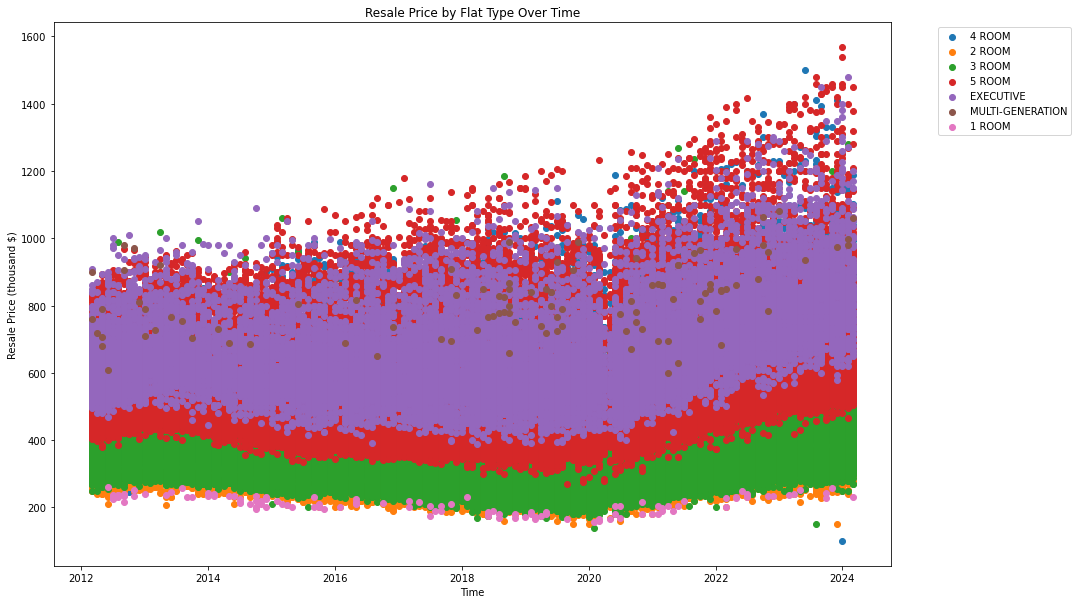

In [24]:
# Get unique flat types
flat_types = dfs['flat_type'].unique()

# Create a scatter plot of resale prices over time for each flat type
plt.figure(figsize=(15, 10))
for flat_type in flat_types:
    flat_type_data = dfs[dfs['flat_type'] == flat_type]
    plt.scatter(flat_type_data['month_dt'], flat_type_data['resale_price_thousand'], label=flat_type)

plt.title('Resale Price by Flat Type Over Time')
plt.xlabel('Time')
plt.ylabel('Resale Price (thousand $)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()

From the above, we can observe:
* There is a clear stratification of resale prices based on flat types, with larger flats generally selling for more than smaller ones
* The data indicates a general increase in resale prices over the observed period for all flat types across time
* Despite the general increase, there's considerable variability within each flat type category, implying that other factors also play a significant role in determining resale prices

We can also view the distribution of `flat_model` and `storey_range`'s, `flat_type`'s and `town` in our dataset:

Count of flat_model
Model A                   86288
Improved                  66401
New Generation            37718
Premium Apartment         27913
Simplified                11712
Apartment                 10122
Standard                   8132
Maisonette                 7475
Model A2                   3384
DBSS                       3245
Model A-Maisonette          459
Adjoined flat               442
Type S1                     431
Type S2                     215
Terrace                     151
Premium Apartment Loft      107
Multi Generation            103
2-room                       85
Improved-Maisonette          35
3Gen                         28
Premium Maisonette           20
Name: flat_model, dtype: int64

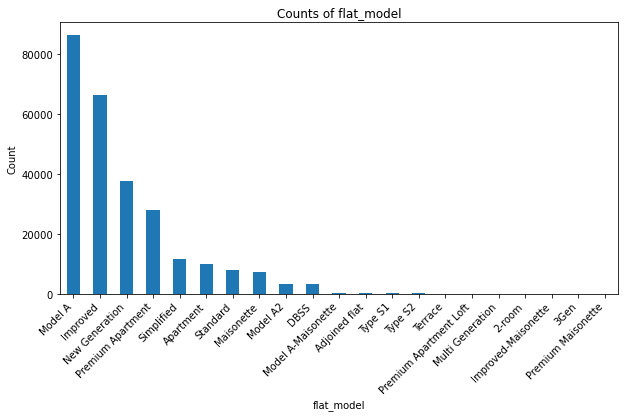

Count of flat_type
4 ROOM              109186
3 ROOM               66754
5 ROOM               64216
EXECUTIVE            20116
2 ROOM                3972
1 ROOM                 119
MULTI-GENERATION       103
Name: flat_type, dtype: int64

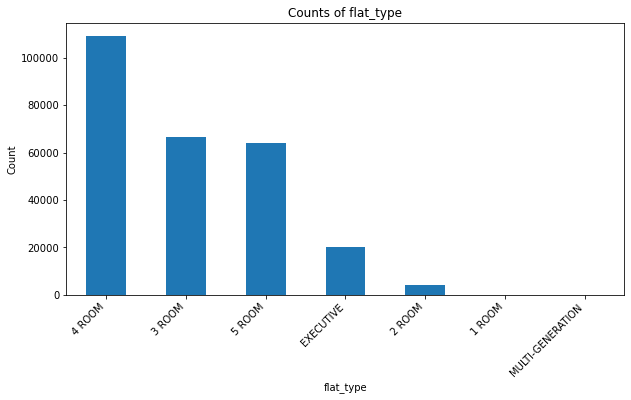

Count of town
SENGKANG           20288
WOODLANDS          19513
JURONG WEST        18834
TAMPINES           18159
YISHUN             17754
PUNGGOL            16022
BEDOK              15187
HOUGANG            13387
CHOA CHU KANG      11791
ANG MO KIO         11644
BUKIT MERAH        10212
BUKIT BATOK        10182
BUKIT PANJANG       9612
TOA PAYOH           8312
PASIR RIS           8198
KALLANG/WHAMPOA     7912
QUEENSTOWN          7296
SEMBAWANG           6985
GEYLANG             6851
CLEMENTI            6194
JURONG EAST         5655
SERANGOON           5168
BISHAN              4818
CENTRAL AREA        2148
MARINE PARADE       1713
BUKIT TIMAH          631
Name: town, dtype: int64

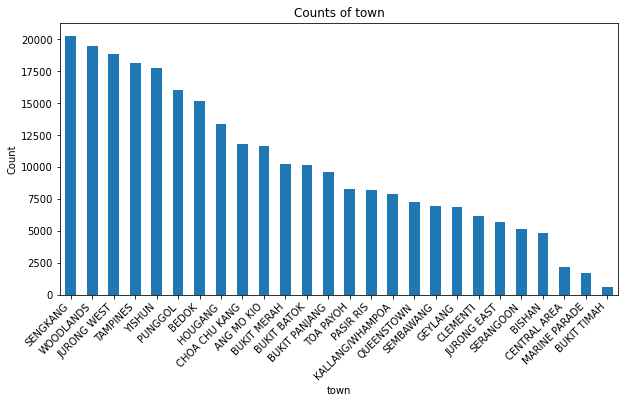

Count of storey_range
04 TO 06    60711
07 TO 09    54827
10 TO 12    48159
01 TO 03    47574
13 TO 15    23247
16 TO 18    10500
19 TO 21     4486
22 TO 24     3144
01 TO 05     2700
06 TO 10     2474
25 TO 27     1829
11 TO 15     1259
28 TO 30     1184
31 TO 33      582
34 TO 36      546
37 TO 39      477
16 TO 20      265
40 TO 42      232
21 TO 25       92
43 TO 45       64
46 TO 48       49
26 TO 30       39
49 TO 51       17
36 TO 40        7
31 TO 35        2
Name: storey_range, dtype: int64

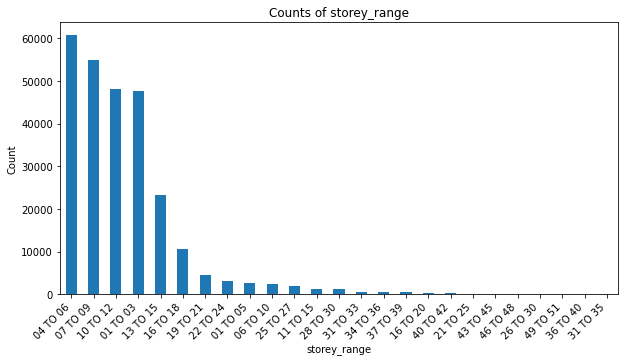

In [25]:
categorical_variables = [
    'flat_model',
    'flat_type',
    'town',
    'storey_range'
]
for col in categorical_variables:
    counts = dfs[col].value_counts()
    # Columnar text counts for reference
    print(f'Count of {col}')
    print(counts, end='')

    counts = dfs[col].value_counts()
    counts.plot(kind='bar', figsize=(10, 5))
    plt.title(f'Counts of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.show()

<br /><br />
For a general overview, the following is a interactive visualisation of the distribution and affect of housing price over time:

In [26]:
%%html
<div class='tableauPlaceholder' id='viz1710941321740' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Si&#47;SingaporeAverageResalePrice&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SingaporeAverageResalePrice&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Si&#47;SingaporeAverageResalePrice&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1710941321740');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1027px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';vizElement.parentNode.insertBefore(scriptElement, vizElement);</script>

In [30]:
ax = sns.lineplot(dfs, x='month_dt', y='resale_price', errorbar=('ci', 95), estimator='median')
ax.set_title('Median resale price per month')
plt.show()

ValueError: Could not interpret value `resale_price` for parameter `y`

In [36]:
numeric_cols = dfs.select_dtypes(include='number')
print(numeric_cols.columns)

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price', 'lease_left',
       'resale_price_thousand'],
      dtype='object')


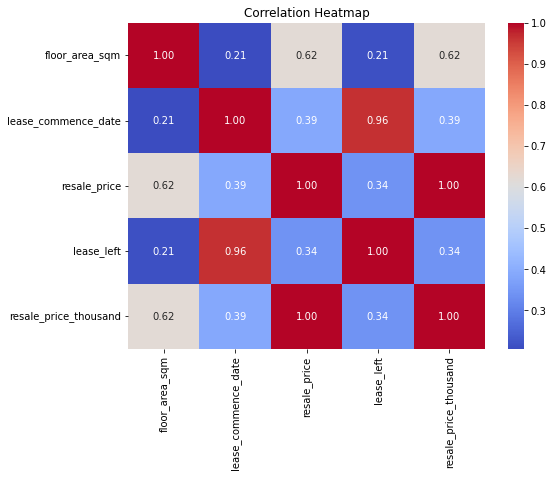

In [39]:
#plotting heatmap for numeric variables
numeric_cols = dfs.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From this correlation heatmap of numeric attributes we can tell that lease_left and lease_commence_date are highly correlated with a correlation value of 0.96, followed by resale_price and floor_area_sqm at 0.62, lease_commence_date and resale_price at 0.39, lease_left and resale_price_thousand at 0.34, and lease_left and floor_area_sqm at 0.21.

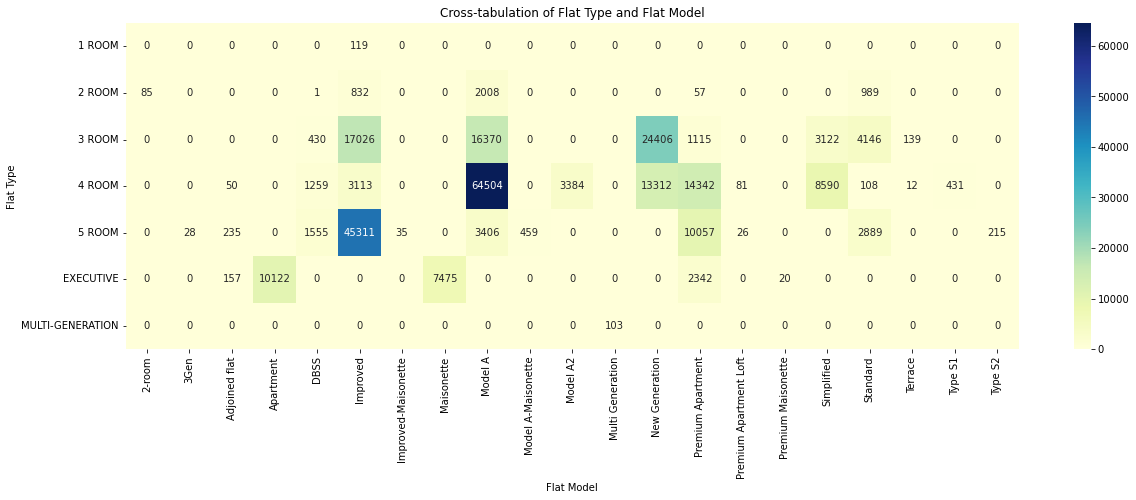

In [40]:
plt.figure(figsize=(20, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Cross-tabulation of Flat Type and Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Flat Type')
plt.show()

This correlation graph depicts the frequency of occurence between the various Flat Model and Flat Type. Flat Model Model A has the highest frequency of 4 Rooms, followed by Improved Flat Model with 5 Rooms. Thirdly new-generation flat models then to be 3 rooms. Within the period of 1976 to 1989, 3 room flats were initated with the New Generation model thus just as seen in the coreelation heat map, a high frequency of new generation models are 3 rooms.

## Task 5: Modeling and visualization

### Objective 1: Identify Location and Room-Type with Highest Investment Return
We can model and see what would be the best investment return for a location and room type by seeing what the lowest and highest median value for a flat type for a given month is (by location), and the ranking them based on this difference

In [28]:
# With this, we get the median resale price per month for each flat_type in each town
grouped_town_flat = dfs.groupby(['town', 'month_dt', 'flat_type'], as_index=False)[['resale_price_thousand']].median()

In [29]:
# Thereafter we sort by town, flat_type, and hence most importantly price and get the first and last entries representing 
# the lowest median price and highest median price for a given month
grouped_town_flat_month_median = grouped_town_flat.sort_values(['town', 'flat_type', 'resale_price_thousand'])\
                                    .groupby(['town', 'flat_type'])\
                                        .agg(['first', 'last'])
grouped_town_flat_month_median

month_dt            resale_price_thousand  \
                                 first       last                 first   
town       flat_type                                                      
ANG MO KIO 2 ROOM           2019-09-01 2023-02-01                 178.0   
           3 ROOM           2019-05-01 2024-02-01                 265.0   
           4 ROOM           2020-05-01 2023-01-01                 380.0   
           5 ROOM           2020-04-01 2024-01-01                 525.0   
           EXECUTIVE        2018-01-01 2023-09-01                 660.0   
...                                ...        ...                   ...   
YISHUN     3 ROOM           2020-05-01 2024-02-01                 250.0   
           4 ROOM           2018-02-01 2024-03-01                 325.0   
           5 ROOM           2018-02-01 2023-12-01                 410.0   
           EXECUTIVE        2017-10-01 2022-10-01                 499.0   
           MULTI-GENERATION 2016-09-01 2023-01-01                 650.0   

                                       
                                 last  
town       flat_type                   
ANG MO KIO 2 ROOM             310.944  
           3 ROOM             403.000  
           4 ROOM             735.000  
           5 ROOM             992.944  
           EXECUTIVE         1180.000  
...                               ...  
YISHUN     3 ROOM             409.888  
           4 ROOM             542.000  
           5 ROOM             678.000  
           EXECUTIVE          875.400  
           MULTI-GENERATION  1080.000  

[131 rows x 4 columns]

In [30]:
# lets rename the columns
grouped_town_flat_month_median.reset_index(inplace=True)
grouped_town_flat_month_median.columns = ['town', 
                                          'flat_type', 
                                          'month_min', 
                                          'month_max', 
                                          'resale_price_thousand_min', 
                                          'resale_price_thousand_max']
grouped_town_flat_month_median

,town,flat_type,month_min,month_max,resale_price_thousand_min,resale_price_thousand_max
0,ANG MO KIO,2 ROOM,2019-09-01,2023-02-01,178.0,310.944
1,ANG MO KIO,3 ROOM,2019-05-01,2024-02-01,265.0,403.000
2,ANG MO KIO,4 ROOM,2020-05-01,2023-01-01,380.0,735.000
3,ANG MO KIO,5 ROOM,2020-04-01,2024-01-01,525.0,992.944
4,ANG MO KIO,EXECUTIVE,2018-01-01,2023-09-01,660.0,1180.000
...,...,...,...,...,...,...
126,YISHUN,3 ROOM,2020-05-01,2024-02-01,250.0,409.888
127,YISHUN,4 ROOM,2018-02-01,2024-03-01,325.0,542.000
128,YISHUN,5 ROOM,2018-02-01,2023-12-01,410.0,678.000
129,YISHUN,EXECUTIVE,2017-10-01,2022-10-01,499.0,875.400


From the following, we can use it to calculate Returns on investment (ROI) defined as:

$\text{ROI} = \frac{\text{Final value of investment} - \text{Initial value of investment}}{\text{Cost of investment}} \times 100\%$

Where in this case, as we are are finding the highest hypothetical return, would be where someone had the opportunity to buy low and sell high; becomes the following:

$\text{ROI} = \frac{\text{resale\_price\_thousand\_max - resale\_price\_thousand\_min}}{\text{resale\_price\_thousand\_min}} \times 100\%$

In [31]:
# Calculating ROI
grouped_town_flat_month_median['median_roi'] = ((grouped_town_flat_month_median['resale_price_thousand_max'] - \
                                            grouped_town_flat_month_median['resale_price_thousand_min']) / \
                                            grouped_town_flat_month_median['resale_price_thousand_min']) * 100

In [32]:
top_50 = grouped_town_flat_month_median.sort_values(by=['median_roi'], ascending=False).head(50)
top_50

,town,flat_type,month_min,month_max,resale_price_thousand_min,resale_price_thousand_max,median_roi
21,BUKIT MERAH,2 ROOM,2020-05-01,2024-02-01,170.000,523.000,207.647059
37,CENTRAL AREA,4 ROOM,2014-08-01,2023-08-01,420.000,1200.000,185.714286
80,PASIR RIS,3 ROOM,2019-10-01,2023-12-01,215.000,610.000,183.720930
38,CENTRAL AREA,5 ROOM,2012-03-01,2023-10-01,575.500,1438.888,150.023979
45,CLEMENTI,2 ROOM,2019-06-01,2023-05-01,205.000,492.000,140.000000
89,QUEENSTOWN,2 ROOM,2018-11-01,2023-12-01,185.000,431.500,133.243243
48,CLEMENTI,5 ROOM,2018-01-01,2024-01-01,526.000,1180.000,124.334601
35,CENTRAL AREA,2 ROOM,2020-06-01,2023-06-01,200.000,430.000,115.000000
47,CLEMENTI,4 ROOM,2019-04-01,2024-02-01,418.000,870.000,108.133971
52,GEYLANG,4 ROOM,2014-08-01,2023-10-01,377.000,770.000,104.244032


In [33]:
print(top_50['flat_type'].value_counts())
print()
print(top_50['town'].value_counts())

flat_type
EXECUTIVE           13
2 ROOM              10
5 ROOM              10
4 ROOM               9
3 ROOM               7
MULTI-GENERATION     1
Name: count, dtype: int64

town
ANG MO KIO         4
KALLANG/WHAMPOA    4
SERANGOON          3
SEMBAWANG          3
CLEMENTI           3
GEYLANG            3
BUKIT BATOK        3
TOA PAYOH          3
CENTRAL AREA       3
WOODLANDS          3
BUKIT TIMAH        2
BUKIT MERAH        2
BEDOK              2
BISHAN             2
JURONG WEST        1
BUKIT PANJANG      1
JURONG EAST        1
HOUGANG            1
QUEENSTOWN         1
PASIR RIS          1
YISHUN             1
PUNGGOL            1
TAMPINES           1
CHOA CHU KANG      1
Name: count, dtype: int64


From the above, we can observe within the top 50 median resale prices over time:
* Ang Mo Kio and KALLANG/WHAMPOA represented one of the highest towns for investing, as they have more `flat_types` that had a high ROI
* Executive flats is represented with the highest ROI in terms of `flat_types` across many different towns (13 / 26 different towns are in the top 50)

### Objective 2: Predict Price Growth for Future Using Machine Learning
We can run the cleaned data through different models and evaluate the accuracy as well as derive insight from the machine learning models on how each variable affects resale price.

In [34]:
import datetime
import numpy as np

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
# HistGradientBoostingRegressor was found to yield a higher accuracy than GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor 

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
dfs['month_timestamp'] = dfs['month_dt'].apply(lambda x: x.timestamp())

In [37]:
train_cols = [
    'month_timestamp',
    'town',
    'flat_type',
    'storey_range',
    'floor_area_sqm',
    'flat_model',
    'lease_commence_date',
    'lease_left'
]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    dfs[train_cols], dfs["resale_price"], test_size=0.25
)

In [47]:
dfs['flat_type'].drop_duplicates().sort_values().to_list()

['1 ROOM',
 '2 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 'EXECUTIVE',
 'MULTI-GENERATION']

In [48]:
dfs['storey_range'].drop_duplicates().sort_values().to_list()

['01 TO 03',
 '01 TO 05',
 '04 TO 06',
 '06 TO 10',
 '07 TO 09',
 '10 TO 12',
 '11 TO 15',
 '13 TO 15',
 '16 TO 18',
 '16 TO 20',
 '19 TO 21',
 '21 TO 25',
 '22 TO 24',
 '25 TO 27',
 '26 TO 30',
 '28 TO 30',
 '31 TO 33',
 '31 TO 35',
 '34 TO 36',
 '36 TO 40',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

In [49]:
ct = make_column_transformer(
    (OneHotEncoder(), make_column_selector('town|flat_model|flat_type')),
    (OrdinalEncoder(), make_column_selector('storey_range'))
, remainder=StandardScaler())

In [50]:
ct.fit(X_train, y=y_train)

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x2a0ab2dd0>),
                                ('ordinalencoder', OrdinalEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x29f04ba90>)])

In [51]:
model = Pipeline([('Transform', ct), 
                     ('todense', FunctionTransformer(lambda x: np.array(x.todense()), accept_sparse=True)),
                     ('hgbr', HistGradientBoostingRegressor(loss='squared_error'))])

In [52]:
model.fit(X_train, y=y_train)

Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x2a0ab2dd0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x29f04ba90>)])),
                ('todense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x29f82cae0>)),
                ('hgbr', HistGradientBoostingRegressor())])

Now we investigate the accuracy by calling [`.score(X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor.score):

In [54]:
print(f'The model accuracy based on test set is:\n{model.score(X_test, y_test)}')

The model accuracy based on test set is:
0.9366303214564475


In [55]:
set(dfs['flat_model'])

{'2-room',
 '3Gen',
 'Adjoined flat',
 'Apartment',
 'DBSS',
 'Improved',
 'Improved-Maisonette',
 'Maisonette',
 'Model A',
 'Model A-Maisonette',
 'Model A2',
 'Multi Generation',
 'New Generation',
 'Premium Apartment',
 'Premium Apartment Loft',
 'Premium Maisonette',
 'Simplified',
 'Standard',
 'Terrace',
 'Type S1',
 'Type S2'}

In [56]:
print('This timestamp will be used as time now', timenow:= datetime.datetime.now().timestamp())

This timestamp will be used as time now 1712412188.504316


In [57]:
prediction = model.predict(pd.DataFrame(
    {
    'month_timestamp': timenow,
    'town': 'CLEMENTI',
    'flat_type': '3 ROOM',
    'storey_range': '01 TO 05',
    'floor_area_sqm': 121.0,
    'flat_model': 'Standard',
    'lease_commence_date': 2012,
    'lease_left': 87.8
}, 
index=[0]
))



In [58]:
print(f'The predicted resale price for the given parameters is: ${round(prediction[0])} SGD')

The predicted resale price for the given parameters is: $883625 SGD


### Linear Regression
We can also run this as a linear regression:

In [59]:
ct = make_column_transformer(
    (OneHotEncoder(), make_column_selector('town|flat_model|flat_type')),
    (OrdinalEncoder(), make_column_selector('storey_range')),
    (StandardScaler(), ["month_timestamp",
                        "floor_area_sqm",
                        "lease_commence_date",
                        "lease_left"]
)
, remainder='drop')

In [60]:
linear_model = Pipeline([('Transform', ct), 
                     ('linear', LinearRegression())])

In [61]:
linear_model.fit(X_train, y=y_train)

Pipeline(steps=[('Transform',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x29e362690>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x29e670450>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['month_timestamp',
                                                   'floor_area_sqm',
                                                   'lease_commence_date',
                                                   'lease_left'])])),
                ('linear', LinearRegression())])

In [62]:
print(f'The model accuracy based on test set is:\n{linear_model.score(X_test, y_test)}')

The model accuracy based on test set is:
0.8057769615243895


We can print and see the effect of each variable on the machine learning model to learn more about how it would affect resale price:

In [63]:
print(f"Intercept: {linear_model.named_steps.linear.intercept_}")
for name, coef in zip(ct.get_feature_names_out(), linear_model.named_steps.linear.coef_):
    print(name.split('__')[1], coef)

Intercept: 553065.2029459307
town_ANG MO KIO 24321.78743657164
town_BEDOK 7218.542689022119
town_BISHAN 107382.23858178804
town_BUKIT BATOK -50488.155731940795
town_BUKIT MERAH 126042.8218397145
town_BUKIT PANJANG -111722.82382667858
town_BUKIT TIMAH 208647.44467125164
town_CENTRAL AREA 119784.84426965583
town_CHOA CHU KANG -137141.16386735527
town_CLEMENTI 54239.560309284956
town_GEYLANG 53960.05259068441
town_HOUGANG -52153.86752163446
town_JURONG EAST -45154.720878324704
town_JURONG WEST -102468.74899435315
town_KALLANG/WHAMPOA 77402.00581417649
town_MARINE PARADE 167139.8109543963
town_PASIR RIS -79299.02416845624
town_PUNGGOL -102925.84428183631
town_QUEENSTOWN 131536.7917951916
town_SEMBAWANG -143755.66099052
town_SENGKANG -113614.96741068331
town_SERANGOON 19967.97057315614
town_TAMPINES -23183.761813552384
town_TOA PAYOH 72006.49931886738
town_WOODLANDS -126453.31614587983
town_YISHUN -81288.31521289318
flat_type_1 ROOM -62851.97977584626
flat_type_2 ROOM -45625.60874521923
fla

In [64]:
l_prediction = linear_model.predict(pd.DataFrame(
    {
    'month_timestamp': timenow,
    'town': 'CLEMENTI',
    'flat_type': '3 ROOM',
    'storey_range': '01 TO 05',
    'floor_area_sqm': 121.0,
    'flat_model': 'Standard',
    'lease_commence_date': 2012,
    'lease_left': 87.8
}, 
index=[0]
))

In [65]:
print(f'The predicted resale price for the given parameters is: ${round(l_prediction[0])} SGD')

The predicted resale price for the given parameters is: $748673 SGD


## Task 6: Report insights and conclusions

<pre>
In the report, describe all the tasks above. You can describe each task at relevant places in the
notebook rather than writing a long essay at the beginning/in the end. In your reports, have a
section that explicitly presents your insights into the problem being solved and the conclusions
you draw.
</pre>